In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
from pandas import json_normalize
import pandas as pd

#### Import song collection data

In [4]:
song_coll = pd.read_csv('songs_coll_with_audio_feat.csv')
song_coll

,title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Take Me To Church,['Hozier'],spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4
1,Cooler Than Me - Single Mix,"['Mike Posner', 'Gigamesh']",spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.179000,0.000000,0.6890,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4
2,See You Again (feat. Kali Uchis),"['Tyler, The Creator', 'Kali Uchis']",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371000,0.000007,0.1090,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4
3,Pompeii,['Bastille'],spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.075500,0.000000,0.2710,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4
4,Hips Don't Lie (feat. Wyclef Jean),"['Shakira', 'Wyclef Jean']",spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.284000,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,Hot N Cold,['Katy Perry'],spotify:track:1ulXmqjktxSdrdT1bzc69H,0.706,0.841,7,-3.956,1,0.0418,0.000079,0.000000,0.0688,0.861,132.032,audio_features,1ulXmqjktxSdrdT1bzc69H,https://api.spotify.com/v1/tracks/1ulXmqjktxSd...,https://api.spotify.com/v1/audio-analysis/1ulX...,220227,4
7983,What Lovers Do,"['Maroon 5', 'SZA']",spotify:track:0ExtPzAWi4arQz6kaabm02,0.799,0.597,5,-5.131,0,0.0611,0.078800,0.000006,0.1000,0.419,110.001,audio_features,0ExtPzAWi4arQz6kaabm02,https://api.spotify.com/v1/tracks/0ExtPzAWi4ar...,https://api.spotify.com/v1/audio-analysis/0Ext...,199849,4
7984,You Need To Calm Down - Clean Bandit Remix,"['Taylor Swift', 'Clean Bandit']",spotify:track:7Bjf96uNizpvXLvNyOJpst,0.726,0.880,2,-4.137,1,0.0581,0.072000,0.000462,0.0906,0.739,95.037,audio_features,7Bjf96uNizpvXLvNyOJpst,https://api.spotify.com/v1/tracks/7Bjf96uNizpv...,https://api.spotify.com/v1/audio-analysis/7Bjf...,152773,4
7985,Barracuda,['Heart'],spotify:track:4KfSdst7rW39C0sfhArdrz,0.548,0.691,4,-13.553,0,0.0369,0.015000,0.106000,0.1440,0.667,137.145,audio_features,4KfSdst7rW39C0sfhArdrz,https://api.spotify.com/v1/tracks/4KfSdst7rW39...,https://api.spotify.com/v1/audio-analysis/4KfS...,261933,4


#### Get just the audio features from each song

In [6]:
audio_feat_df = song_coll[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 
                          'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']].copy()
audio_feat_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.566,0.664,4,-5.303,0,0.0464,0.634000,0.000000,0.1160,0.437,128.945,241688
1,0.768,0.820,7,-4.630,0,0.0474,0.179000,0.000000,0.6890,0.625,129.965,213293
2,0.558,0.559,6,-9.222,1,0.0959,0.371000,0.000007,0.1090,0.620,78.558,180387
3,0.679,0.715,9,-6.383,1,0.0407,0.075500,0.000000,0.2710,0.571,127.435,214148
4,0.778,0.824,10,-5.892,0,0.0707,0.284000,0.000000,0.4050,0.758,100.024,218093
...,...,...,...,...,...,...,...,...,...,...,...,...
7982,0.706,0.841,7,-3.956,1,0.0418,0.000079,0.000000,0.0688,0.861,132.032,220227
7983,0.799,0.597,5,-5.131,0,0.0611,0.078800,0.000006,0.1000,0.419,110.001,199849
7984,0.726,0.880,2,-4.137,1,0.0581,0.072000,0.000462,0.0906,0.739,95.037,152773
7985,0.548,0.691,4,-13.553,0,0.0369,0.015000,0.106000,0.1440,0.667,137.145,261933


#### Create clustering model on the basis of the audio features

In [25]:
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(audio_feat_df)
audio_feat_df_prep = scaler.transform(audio_feat_df)

# Now, all features will have the same weight.
pd.DataFrame(audio_feat_df_prep,columns=audio_feat_df.columns).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.556796,-0.131243,-0.343729,0.365447,-1.176814,-0.536730,1.904804,-0.233570,-0.503171,-0.361871,0.261146,0.511047
1,0.841222,0.707881,0.486940,0.602194,-1.176814,-0.526214,-0.015664,-0.233570,3.381723,0.443022,0.298771,-0.056126
2,-0.612163,-0.696038,0.210051,-1.013173,0.849752,-0.016195,0.794731,-0.233518,-0.550630,0.421616,-1.597497,-0.713403
3,0.225263,0.143086,1.040720,-0.014474,0.849752,-0.596670,-0.452518,-0.233570,0.547717,0.211830,0.205446,-0.039048
4,0.910431,0.729397,1.317609,0.158249,-1.176814,-0.281195,0.427521,-0.233570,1.456226,1.012442,-0.805673,0.039751


In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(audio_feat_df_prep)

KMeans(n_clusters=3)

In [9]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(audio_feat_df_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    3877
1    3000
2    1110
dtype: int64

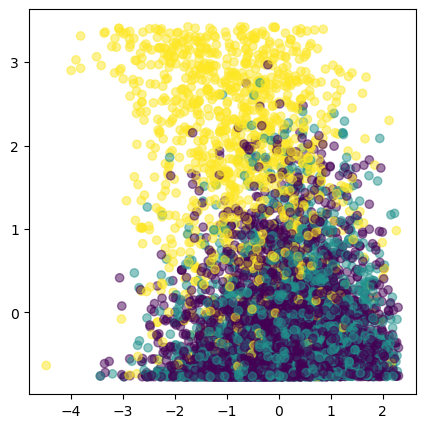

In [11]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.figure(figsize=(5, 5))
plt.scatter(audio_feat_df_prep[:, 0], audio_feat_df_prep[:, 6], c=clusters,alpha=0.5)
plt.show()

#### 3 clusters does not seem to fit, another number has to be used. To determine number of clusters, inertia score could help:

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

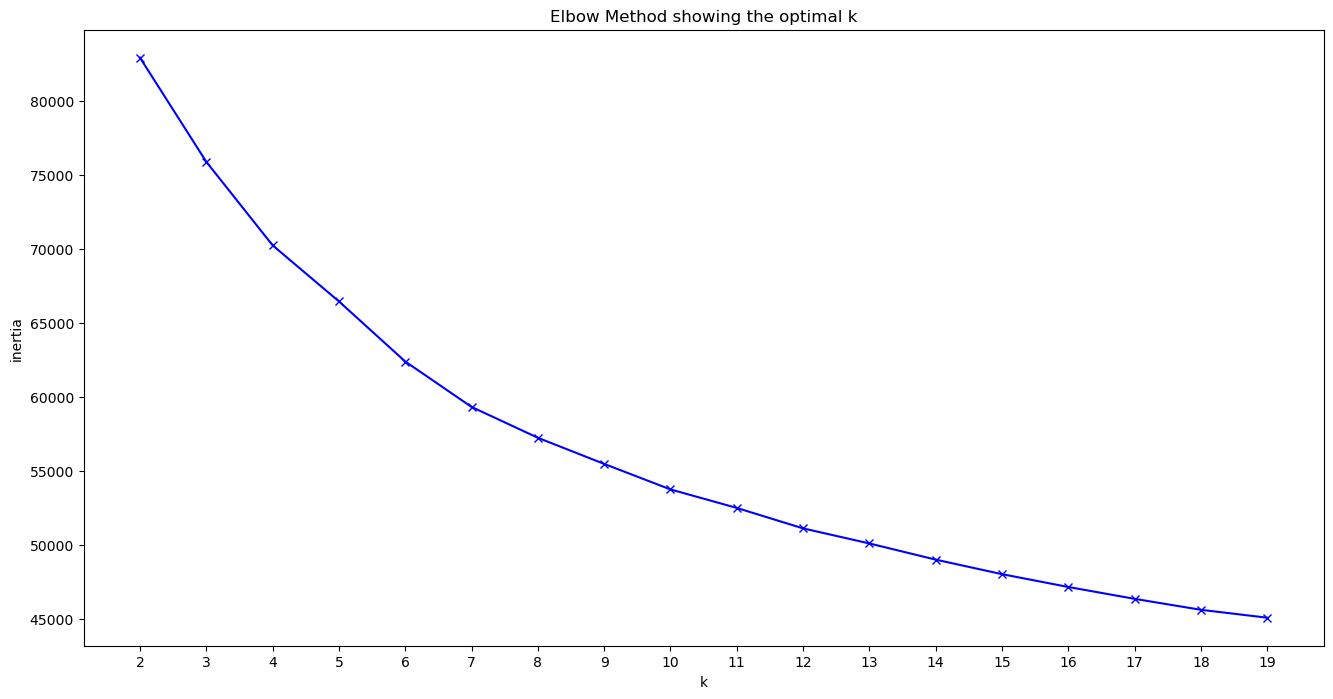

In [12]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(audio_feat_df_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### No clear ellbow can be detected to determine number of clusters. Will try silhouette score:

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

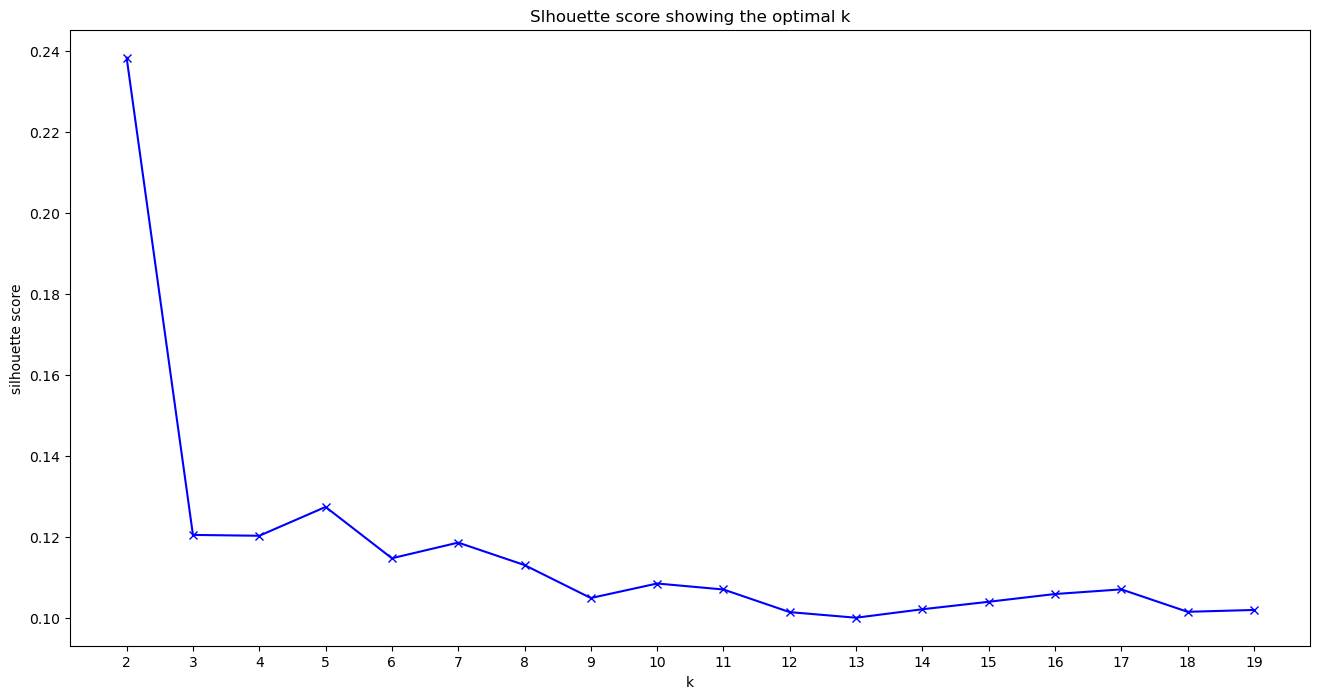

In [16]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(audio_feat_df_prep)
    silhouette.append(silhouette_score(audio_feat_df_prep, kmeans.predict(audio_feat_df_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

#### Will try 5 as number of clusters

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(audio_feat_df_prep)

KMeans(n_clusters=5, random_state=1234)

In [27]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(audio_feat_df_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    2500
1    1022
2    3216
3     973
4     276
dtype: int64

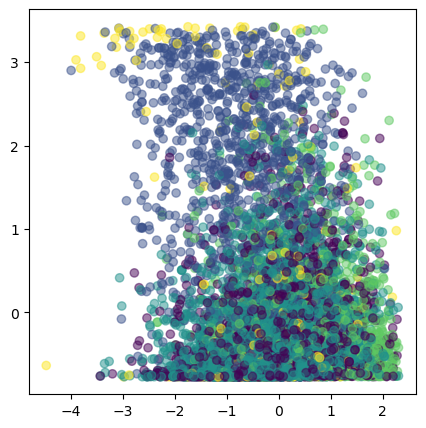

In [28]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.figure(figsize=(5, 5))
plt.scatter(audio_feat_df_prep[:, 0], audio_feat_df_prep[:, 6], c=clusters,alpha=0.5)
plt.show()

In [29]:
len(clusters)

7987

In [30]:
type(clusters)

numpy.ndarray

#### Append the clusters array as new column to song_coll dataframe

In [31]:
song_coll['cluster'] = clusters.tolist()

In [32]:
song_coll

,title,artists,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,cluster
0,Take Me To Church,['Hozier'],spotify:track:7dS5EaCoMnN7DzlpT6aRn2,0.566,0.664,4,-5.303,0,0.0464,0.634000,...,0.1160,0.437,128.945,audio_features,7dS5EaCoMnN7DzlpT6aRn2,https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...,https://api.spotify.com/v1/audio-analysis/7dS5...,241688,4,0
1,Cooler Than Me - Single Mix,"['Mike Posner', 'Gigamesh']",spotify:track:2V4bv1fNWfTcyRJKmej6Sj,0.768,0.820,7,-4.630,0,0.0474,0.179000,...,0.6890,0.625,129.965,audio_features,2V4bv1fNWfTcyRJKmej6Sj,https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...,https://api.spotify.com/v1/audio-analysis/2V4b...,213293,4,0
2,See You Again (feat. Kali Uchis),"['Tyler, The Creator', 'Kali Uchis']",spotify:track:7KA4W4McWYRpgf0fWsJZWB,0.558,0.559,6,-9.222,1,0.0959,0.371000,...,0.1090,0.620,78.558,audio_features,7KA4W4McWYRpgf0fWsJZWB,https://api.spotify.com/v1/tracks/7KA4W4McWYRp...,https://api.spotify.com/v1/audio-analysis/7KA4...,180387,4,1
3,Pompeii,['Bastille'],spotify:track:3gbBpTdY8lnQwqxNCcf795,0.679,0.715,9,-6.383,1,0.0407,0.075500,...,0.2710,0.571,127.435,audio_features,3gbBpTdY8lnQwqxNCcf795,https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...,https://api.spotify.com/v1/audio-analysis/3gbB...,214148,4,2
4,Hips Don't Lie (feat. Wyclef Jean),"['Shakira', 'Wyclef Jean']",spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,0.778,0.824,10,-5.892,0,0.0707,0.284000,...,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,Hot N Cold,['Katy Perry'],spotify:track:1ulXmqjktxSdrdT1bzc69H,0.706,0.841,7,-3.956,1,0.0418,0.000079,...,0.0688,0.861,132.032,audio_features,1ulXmqjktxSdrdT1bzc69H,https://api.spotify.com/v1/tracks/1ulXmqjktxSd...,https://api.spotify.com/v1/audio-analysis/1ulX...,220227,4,2
7983,What Lovers Do,"['Maroon 5', 'SZA']",spotify:track:0ExtPzAWi4arQz6kaabm02,0.799,0.597,5,-5.131,0,0.0611,0.078800,...,0.1000,0.419,110.001,audio_features,0ExtPzAWi4arQz6kaabm02,https://api.spotify.com/v1/tracks/0ExtPzAWi4ar...,https://api.spotify.com/v1/audio-analysis/0Ext...,199849,4,0
7984,You Need To Calm Down - Clean Bandit Remix,"['Taylor Swift', 'Clean Bandit']",spotify:track:7Bjf96uNizpvXLvNyOJpst,0.726,0.880,2,-4.137,1,0.0581,0.072000,...,0.0906,0.739,95.037,audio_features,7Bjf96uNizpvXLvNyOJpst,https://api.spotify.com/v1/tracks/7Bjf96uNizpv...,https://api.spotify.com/v1/audio-analysis/7Bjf...,152773,4,2
7985,Barracuda,['Heart'],spotify:track:4KfSdst7rW39C0sfhArdrz,0.548,0.691,4,-13.553,0,0.0369,0.015000,...,0.1440,0.667,137.145,audio_features,4KfSdst7rW39C0sfhArdrz,https://api.spotify.com/v1/tracks/4KfSdst7rW39...,https://api.spotify.com/v1/audio-analysis/4KfS...,261933,4,0


In [33]:
song_coll.to_csv('clustered_songs.csv', index=False)

#### Save the kmeans model:

In [35]:
# save the model
import pickle
kmeans_model = 'kmeans_model.sav'
pickle.dump(kmeans, open(kmeans_model, 'wb'))

#### Save the Scaler

In [36]:
scaler_file = 'standard_scaler.sav'
pickle.dump(scaler, open(scaler_file, 'wb'))